# Examples for DA fitting

This notebook gives an overview of python functions implemented for the analysis of dynamic aperture data from SixDesk.

## Initialize

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sixdesk.da import * 

# Dynamic aperture vs. turn from SixDeskDB

The functionality for the fitting is provided by the davst class in the sixdesk module.

## Plot the DA vs. turn Data from SixDeskDB

In [20]:
a = davst('/home/phermes/development/SixDeskDB/chromB2_QP_20_OC_40.db',emit=2.5)

Get the data for seed number 5

In [21]:
data = a.clean_data_for_seed(12)

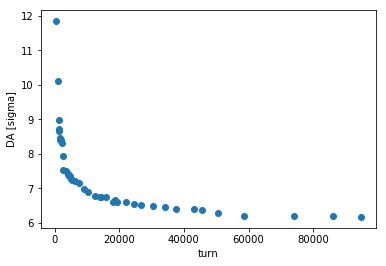

In [22]:
plt.errorbar(data['nturnavg'], data['dawsimp'], fmt='o', yerr=data['dawsimperr'])
plt.xlabel("turn")
plt.ylabel("DA [sigma]")
plt.show()

## Perform the fitting for one seed
Fit the data and get back the fit parameters

In [23]:
a.fit(seeds=[12])

/home/phermes/development/mk_loss_da/Examples/sixdesk/da.py:298: RuntimeWarning: invalid value encountered in log10
  da = d + (b / (np.log10(turn) ** kappa))
/home/phermes/development/mk_loss_da/Examples/sixdesk/da.py:298: RuntimeWarning: invalid value encountered in power
  da = d + (b / (np.log10(turn) ** kappa))


In [24]:
a.fit_params

seed angle  emit         d           b    k       chi      derr      berr
0    12  None   2.5  5.513671  154.357439  3.4  0.774281  0.021626  2.736045

In [25]:
d = a.fit_params.iloc[0]['d']
b = a.fit_params.iloc[0]['b']
k = a.fit_params.iloc[0]['k']

Plot the data together with the fit

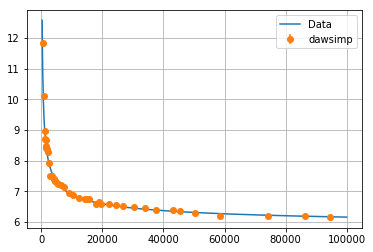

In [28]:
x = np.arange(300,100000,100)
plt.plot(x,davst_function(x,d,b,k),label='Data')
plt.errorbar(data['nturnavg'], data['dawsimp'], fmt='o', yerr=data['dawsimperr'])
plt.legend()
plt.grid()
plt.show()

Plot data and fit for 30 minutes (20241900 turns)

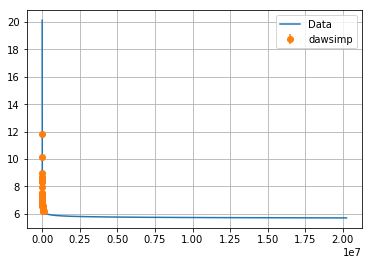

In [29]:
x = np.arange(100,20241900,100)
plt.plot(x,davst_function(x,d,b,k),label='Data')
plt.errorbar(data['nturnavg'], data['dawsimp'], fmt='o', yerr=data['dawsimperr'])
plt.legend()
plt.grid()
plt.show()

## Perform the fitting for all seeds

In [30]:
a  = davst('/home/phermes/development/SixDeskDB/chromB2_QP_20_OC_40.db', emit=2.5)

The heart of the DA fitting is the fit method in davst. In the most simple manner it can be called as

In [31]:
a.fit()

/home/phermes/development/mk_loss_da/Examples/sixdesk/da.py:298: RuntimeWarning: invalid value encountered in log10
  da = d + (b / (np.log10(turn) ** kappa))
/home/phermes/development/mk_loss_da/Examples/sixdesk/da.py:298: RuntimeWarning: invalid value encountered in power
  da = d + (b / (np.log10(turn) ** kappa))


The fit parameters are now stored in a pandas dataframe:

In [32]:
a.fit_params.head()

seed angle  emit         d           b    k       chi      derr       berr
0     1  None   2.5  5.944735  151.189357  3.6  1.066030  0.027710   4.126364
1     2  None   2.5  5.977352  615.269879  4.6  3.205168  0.035143  26.842906
2     3  None   2.5  5.848869  337.441260  4.2  0.760235  0.016158   6.976583
3     4  None   2.5  5.241058   63.574905  2.6  1.415396  0.032503   1.251968
4     5  None   2.5  5.344016  192.985953  3.4  0.551425  0.019769   2.533755

We can also perform the fit with additional options:
- seeds:    define list of seeds to be considered default: 1 to 60
- kappas:   define the values of kappa to be scanned over (must be iterable list of kappas to be considered)
- angles:   fit da vs turns only for a given set of angles. default: None
- dacol:    da value from the sixdeskdb to be used. default: dawsimp
- daerrcol: da error to be considered. default: dawsimperr
- xaxis:    variable to be used as the turn number. default: nturnavg. options: tlossmin, nturnavg, nturn
- save:     save the fit parameters in the sixdesk database (table name fit_params)

In [ ]:
a.fit(seeds=range(1, 61), 
      kappas=[-5, 5, 0.1], 
      angles=None, 
      dacol='dawsimp', 
      daerrcol='dawsimperr', 
      xaxis='nturnavg', 
      save=False)

## DA extrapolation with the fit parameters

To extrapolate the dynamic aperture to macroscopic time scales we can just use 

In [33]:
a.get_extrapolated_da(seconds=1800)
a.get_extrapolated_da(seconds=3600)

The extrapolated DA is stored in the dataframe

In [34]:
a.extrapolated_da.head()

seed angle  emit         d           b    k       chi      derr       berr  \
0     1  None   2.5  5.944735  151.189357  3.6  1.066030  0.027710   4.126364   
1     2  None   2.5  5.977352  615.269879  4.6  3.205168  0.035143  26.842906   
2     3  None   2.5  5.848869  337.441260  4.2  0.760235  0.016158   6.976583   
3     4  None   2.5  5.241058   63.574905  2.6  1.415396  0.032503   1.251968   
4     5  None   2.5  5.344016  192.985953  3.4  0.551425  0.019769   2.533755   

   exda_1800_sec  exda_3600_sec  
0       6.062284       6.046382  
1       6.042826       6.031728  
2       5.928427       5.916018  
3       5.602201       5.566212  
4       5.567355       5.538707

Now we can do all kinds of statistics, histograms, etc. for the fit parameters and the extrapolated DA

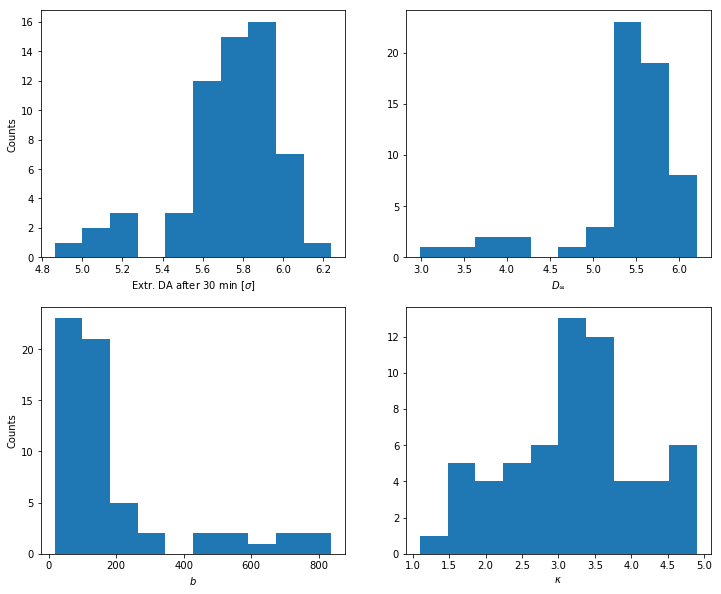

In [35]:
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.hist(a.extrapolated_da['exda_1800_sec'])
ax2.hist(a.extrapolated_da['d'])
ax3.hist(a.extrapolated_da['b'])
ax4.hist(a.extrapolated_da['k'])

ax1.set_xlabel(r'Extr. DA after 30 min [$\sigma$]')
ax2.set_xlabel(r'$D_\infty$')
ax3.set_xlabel(r'$b$')
ax4.set_xlabel(r'$\kappa$')
ax3.set_ylabel(r'Counts')
ax1.set_ylabel('Counts')

plt.show()